In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# for file in directory, load as pandas df
directory = '/Volumes/vosslabhpc/symposia/cpsy-25/data/beh'
files = [f for f in os.listdir(directory) if f.endswith('.csv')]
better = pd.read_csv(os.path.join(directory, 'better_dsst.csv'))

extend = pd.read_csv(os.path.join(directory, 'extend_dsst.csv'))

pacr = pd.read_csv(os.path.join(directory, 'pacr_dsst.csv'))

In [6]:
better

,participant_id,digit_symbol_total
0,120001,75.0
1,120002,76.0
2,120003,104.0
3,120004,76.0
4,120005,75.0
...,...,...
150,121028,NaN
151,121029,NaN
152,121030,NaN
153,121031,NaN


In [7]:
# for better dataframe add b- to the beginning of each row in 'participant_id' column
better['participant_id'] = 'b-' + better['participant_id'].astype(str)
better['score'] = better['digit_symbol_total']
better['id'] = better['participant_id']
better = better[['id', 'score']]
better

,id,score
0,b-120001,75.0
1,b-120002,76.0
2,b-120003,104.0
3,b-120004,76.0
4,b-120005,75.0
...,...,...
150,b-121028,NaN
151,b-121029,NaN
152,b-121030,NaN
153,b-121031,NaN


In [8]:
# for extend dataframe add e- to the beginning of each row in 'EXTEND Study ID' column and rename the column to ID
extend['id'] = 'e-' + extend['EXTEND Study ID'].astype(str)
# remove the .0 from the end of each row in 'ID' column
extend['id'] = extend['id'].str.replace('.0', '', regex=False)
extend = extend.drop(columns=['EXTEND Study ID'])
extend_second_column = extend.columns[1]
# rename the second column to 'score'
extend = extend.rename(columns={extend_second_column: 'score'})
extend = extend[['id', 'score']]
extend

,id,score
0,e-2001,NaN
1,e-2002,79.0
2,e-2003,NaN
3,e-2004,NaN
4,e-nan,NaN
...,...,...
873,e-2874,83.0
874,e-2875,NaN
875,e-2876,NaN
876,e-2877,NaN


In [9]:
# Create a new ID column by adding 'p-' to the 'PACR Study ID#:' column
pacr['id'] = 'p-' + pacr['PACR Study ID#:'].astype(str)

# Remove the .0 from the end of each row in 'ID' column
pacr['id'] = pacr['id'].str.replace('.0', '', regex=False)

# Drop the original 'PACR Study ID#:' column
pacr = pacr.drop(columns=['PACR Study ID#:'])

# Ensure the second column exists before proceeding
if pacr.shape[1] > 1:
    # Get the second column name dynamically
    second_col_name = pacr.columns[1]

    # Convert it to string and store it in 'score' column
    pacr['score'] = pacr[second_col_name].astype(str)

    # Drop the second column
    pacr = pacr.drop(columns=[second_col_name])

pacr = pacr[['id', 'score']]
pacr

,id,score
0,p-15,nan
1,p-8,77.0
2,p-41,81.0
3,p-25,76.0
4,p-12,70.0
...,...,...
102,p-203,51.0
103,p-204,83.0
104,p-206,63.0
105,p-208,64.0


In [10]:
# print len of non nan for each study
print('Better:', len(better[better['score'].notna()]))
print('Extend:', len(extend[extend['score'].notna()]))
print('PACR:', len(pacr[pacr['score'].notna()]))

Better: 65
Extend: 123
PACR: 107


In [11]:
# append all three dataframes together
df = pd.concat([better, extend, pacr], ignore_index=True)
#drop na
df = df.dropna(subset=['score'])
# drop if score value is 'nan'
df = df[df['score'] != 'nan']
# convert score to numeric
df = df.astype({'score': 'float'})
# convert id to string
df['id'] = df['id'].astype(str)
df

,id,score
0,b-120001,75.0
1,b-120002,76.0
2,b-120003,104.0
3,b-120004,76.0
4,b-120005,75.0
...,...,...
1135,p-203,51.0
1136,p-204,83.0
1137,p-206,63.0
1138,p-208,64.0


In [12]:
df.to_csv('../../../../data/struc/dsst.csv', index=False)

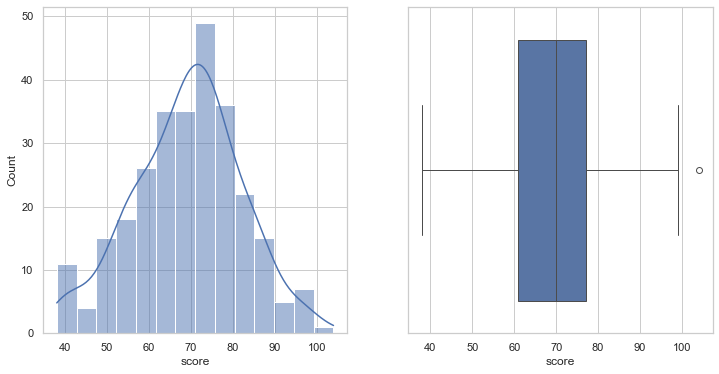

In [16]:
''' plot distribution and boxplot of dsst scores '''
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(df, x='score', kde=True, ax=ax[0])
sns.boxplot(data=df, x='score', ax=ax[1])
plt.show()